In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
res = {'Logistic_reg': [0.929, 0.98, 0.87, 0.93],
 'Single_LSTM': [0.924, 0.88, 0.98, 0.93],
 'AE_LSTM_Anom': [0.726, 0.87, 0.53, 0.66],
 'AE_LSTM': [0.5, 0.5, 1.0, 0.67]}

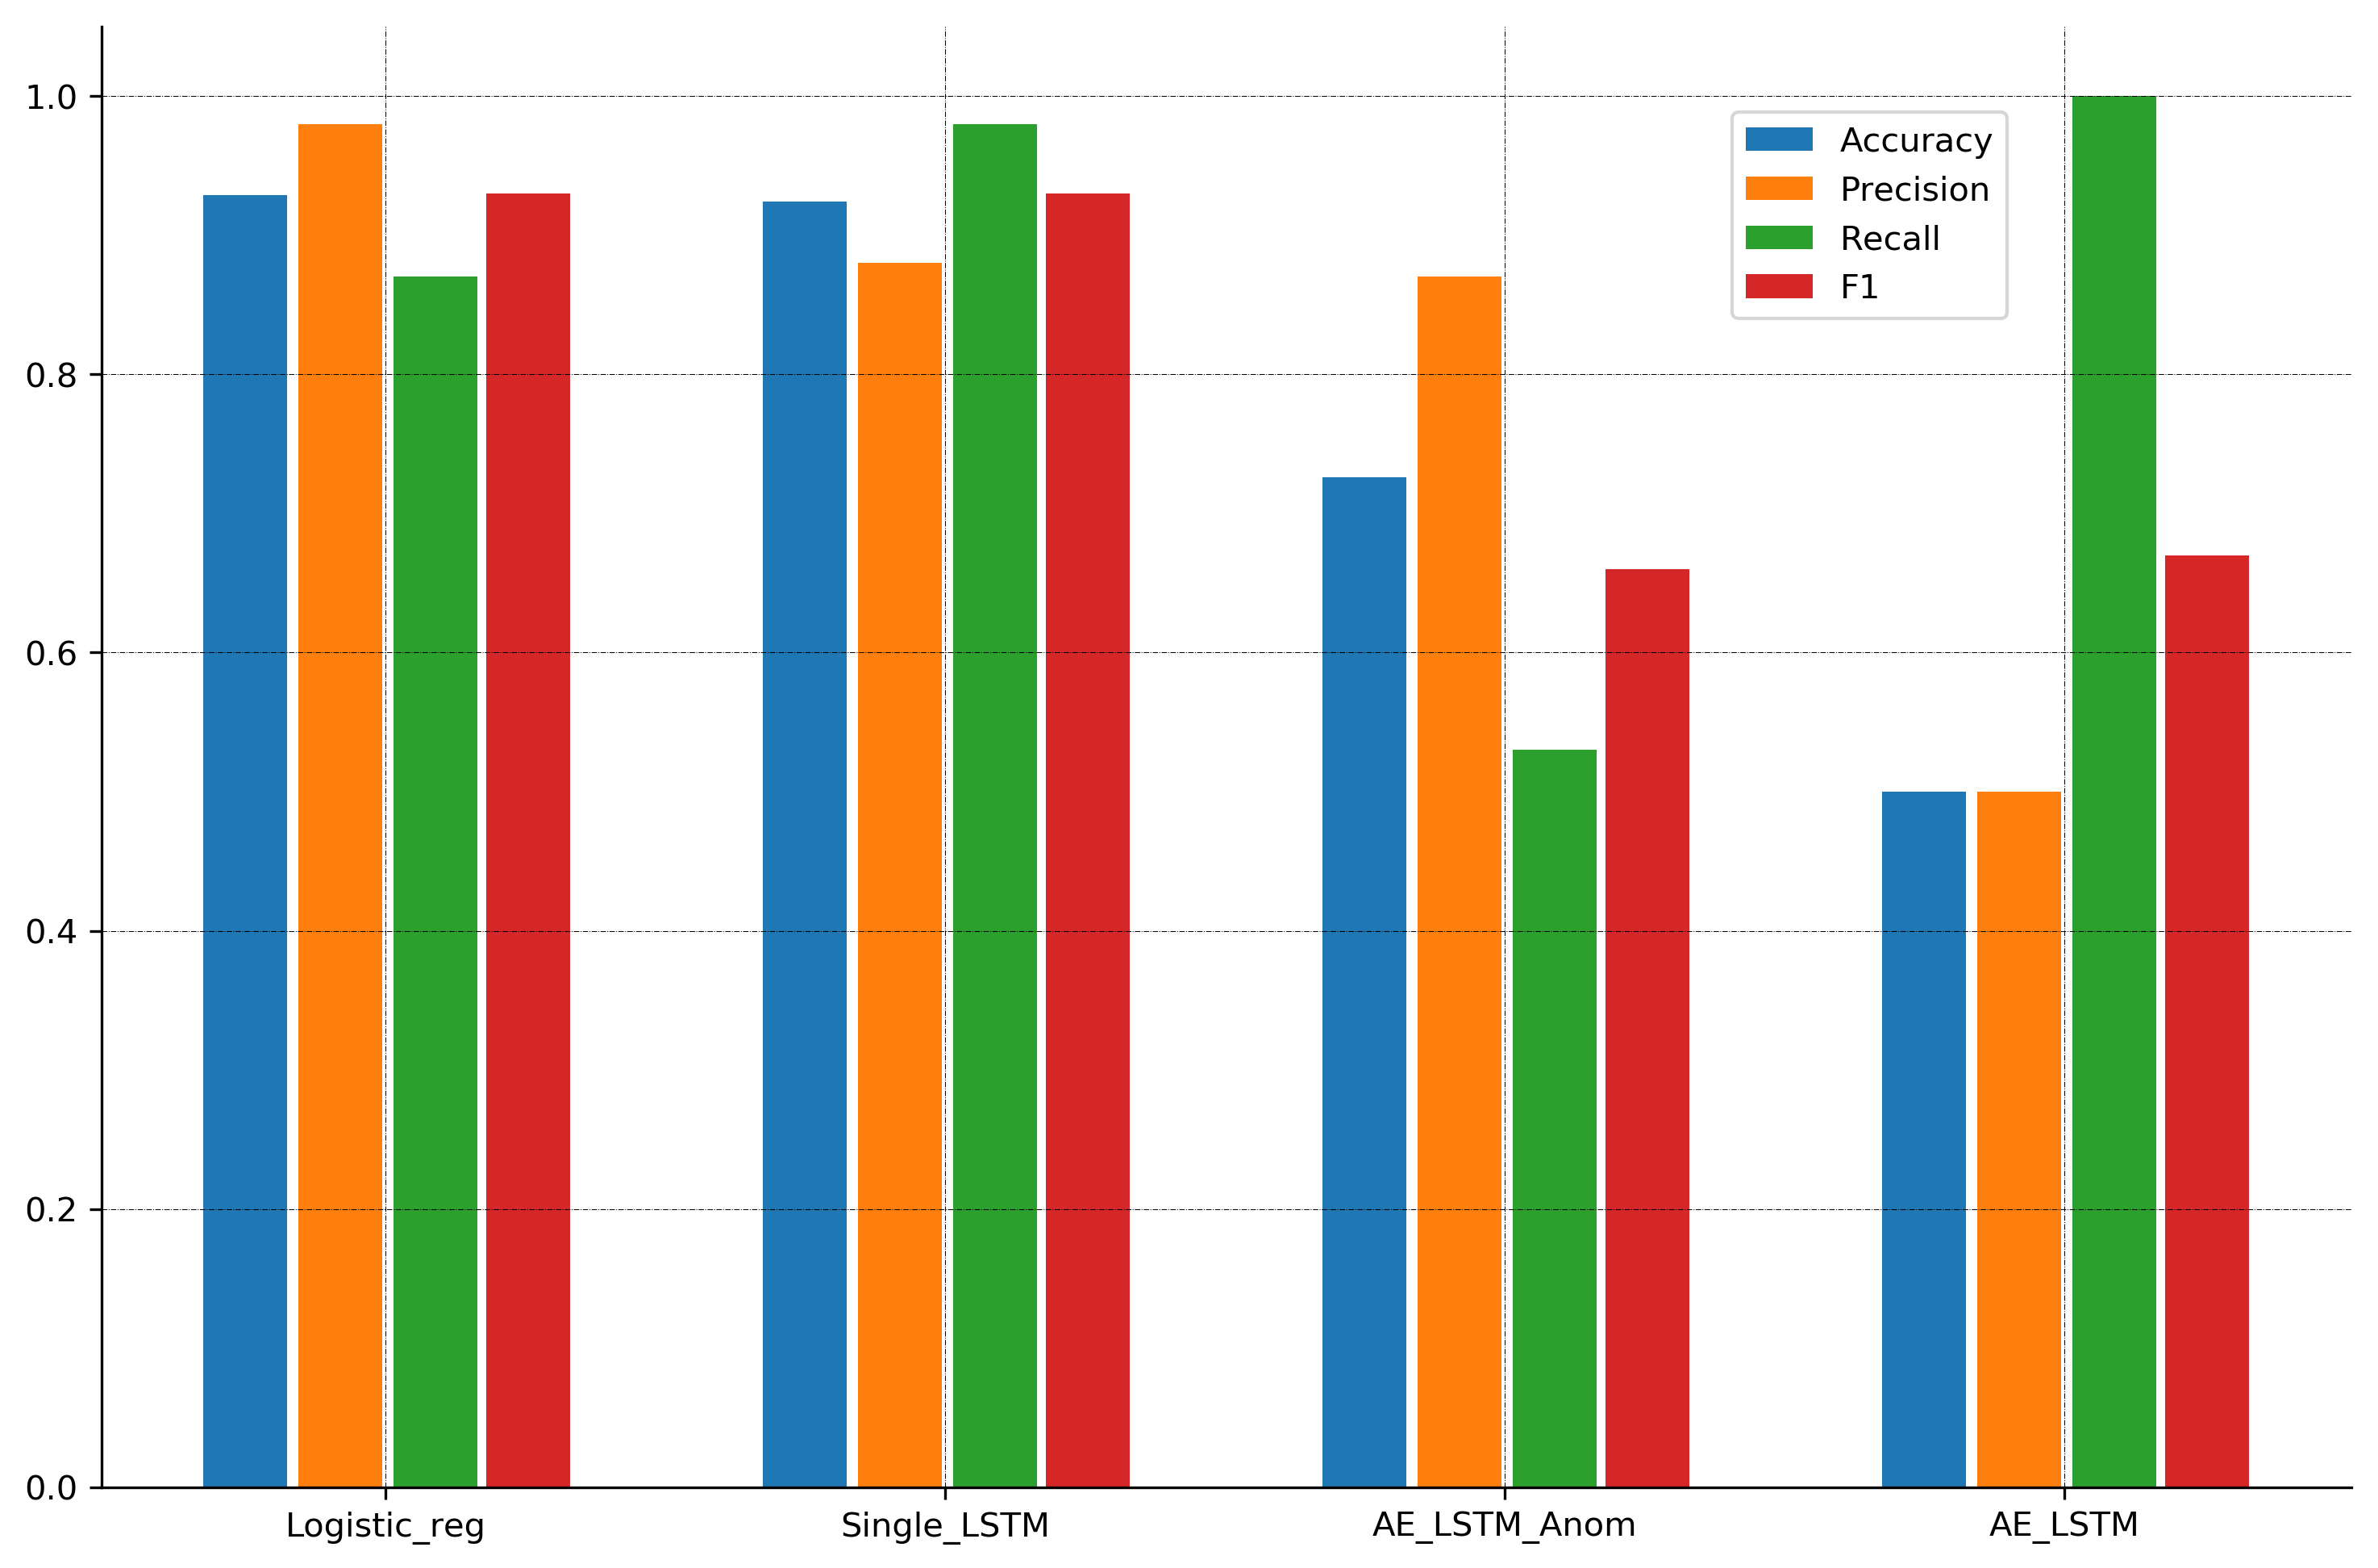

In [3]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

x = np.arange(len(res))
width = 0.15
accuracy = [v[0] for v in res.values()]
precision = [v[1] for v in res.values()]
recall = [v[2] for v in res.values()]
F1 = [v[3] for v in res.values()]

plt.bar(x - 0.25, accuracy, width, label='Accuracy')
plt.bar(x - 0.08, precision, width, label='Precision')
plt.bar(x + 0.09, recall, width, label='Recall')
plt.bar(x + 0.255, F1, width, label='F1')
plt.xticks(x, res.keys(),
           rotation=0)
plt.grid(color='k', ls = '-.', lw = 0.25)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
_ = plt.legend(loc=(0.725, 0.8))

In [4]:
imp = {
    'Generators': 0.0206,
    'Buses': 0.0011,
    'Lines': 0.052,
    'NSG': 0.026,
    'Transformer_loads':  -0.0058,
    'B_L': -0.0008,
    'Bus_NSG': 0.0013
}

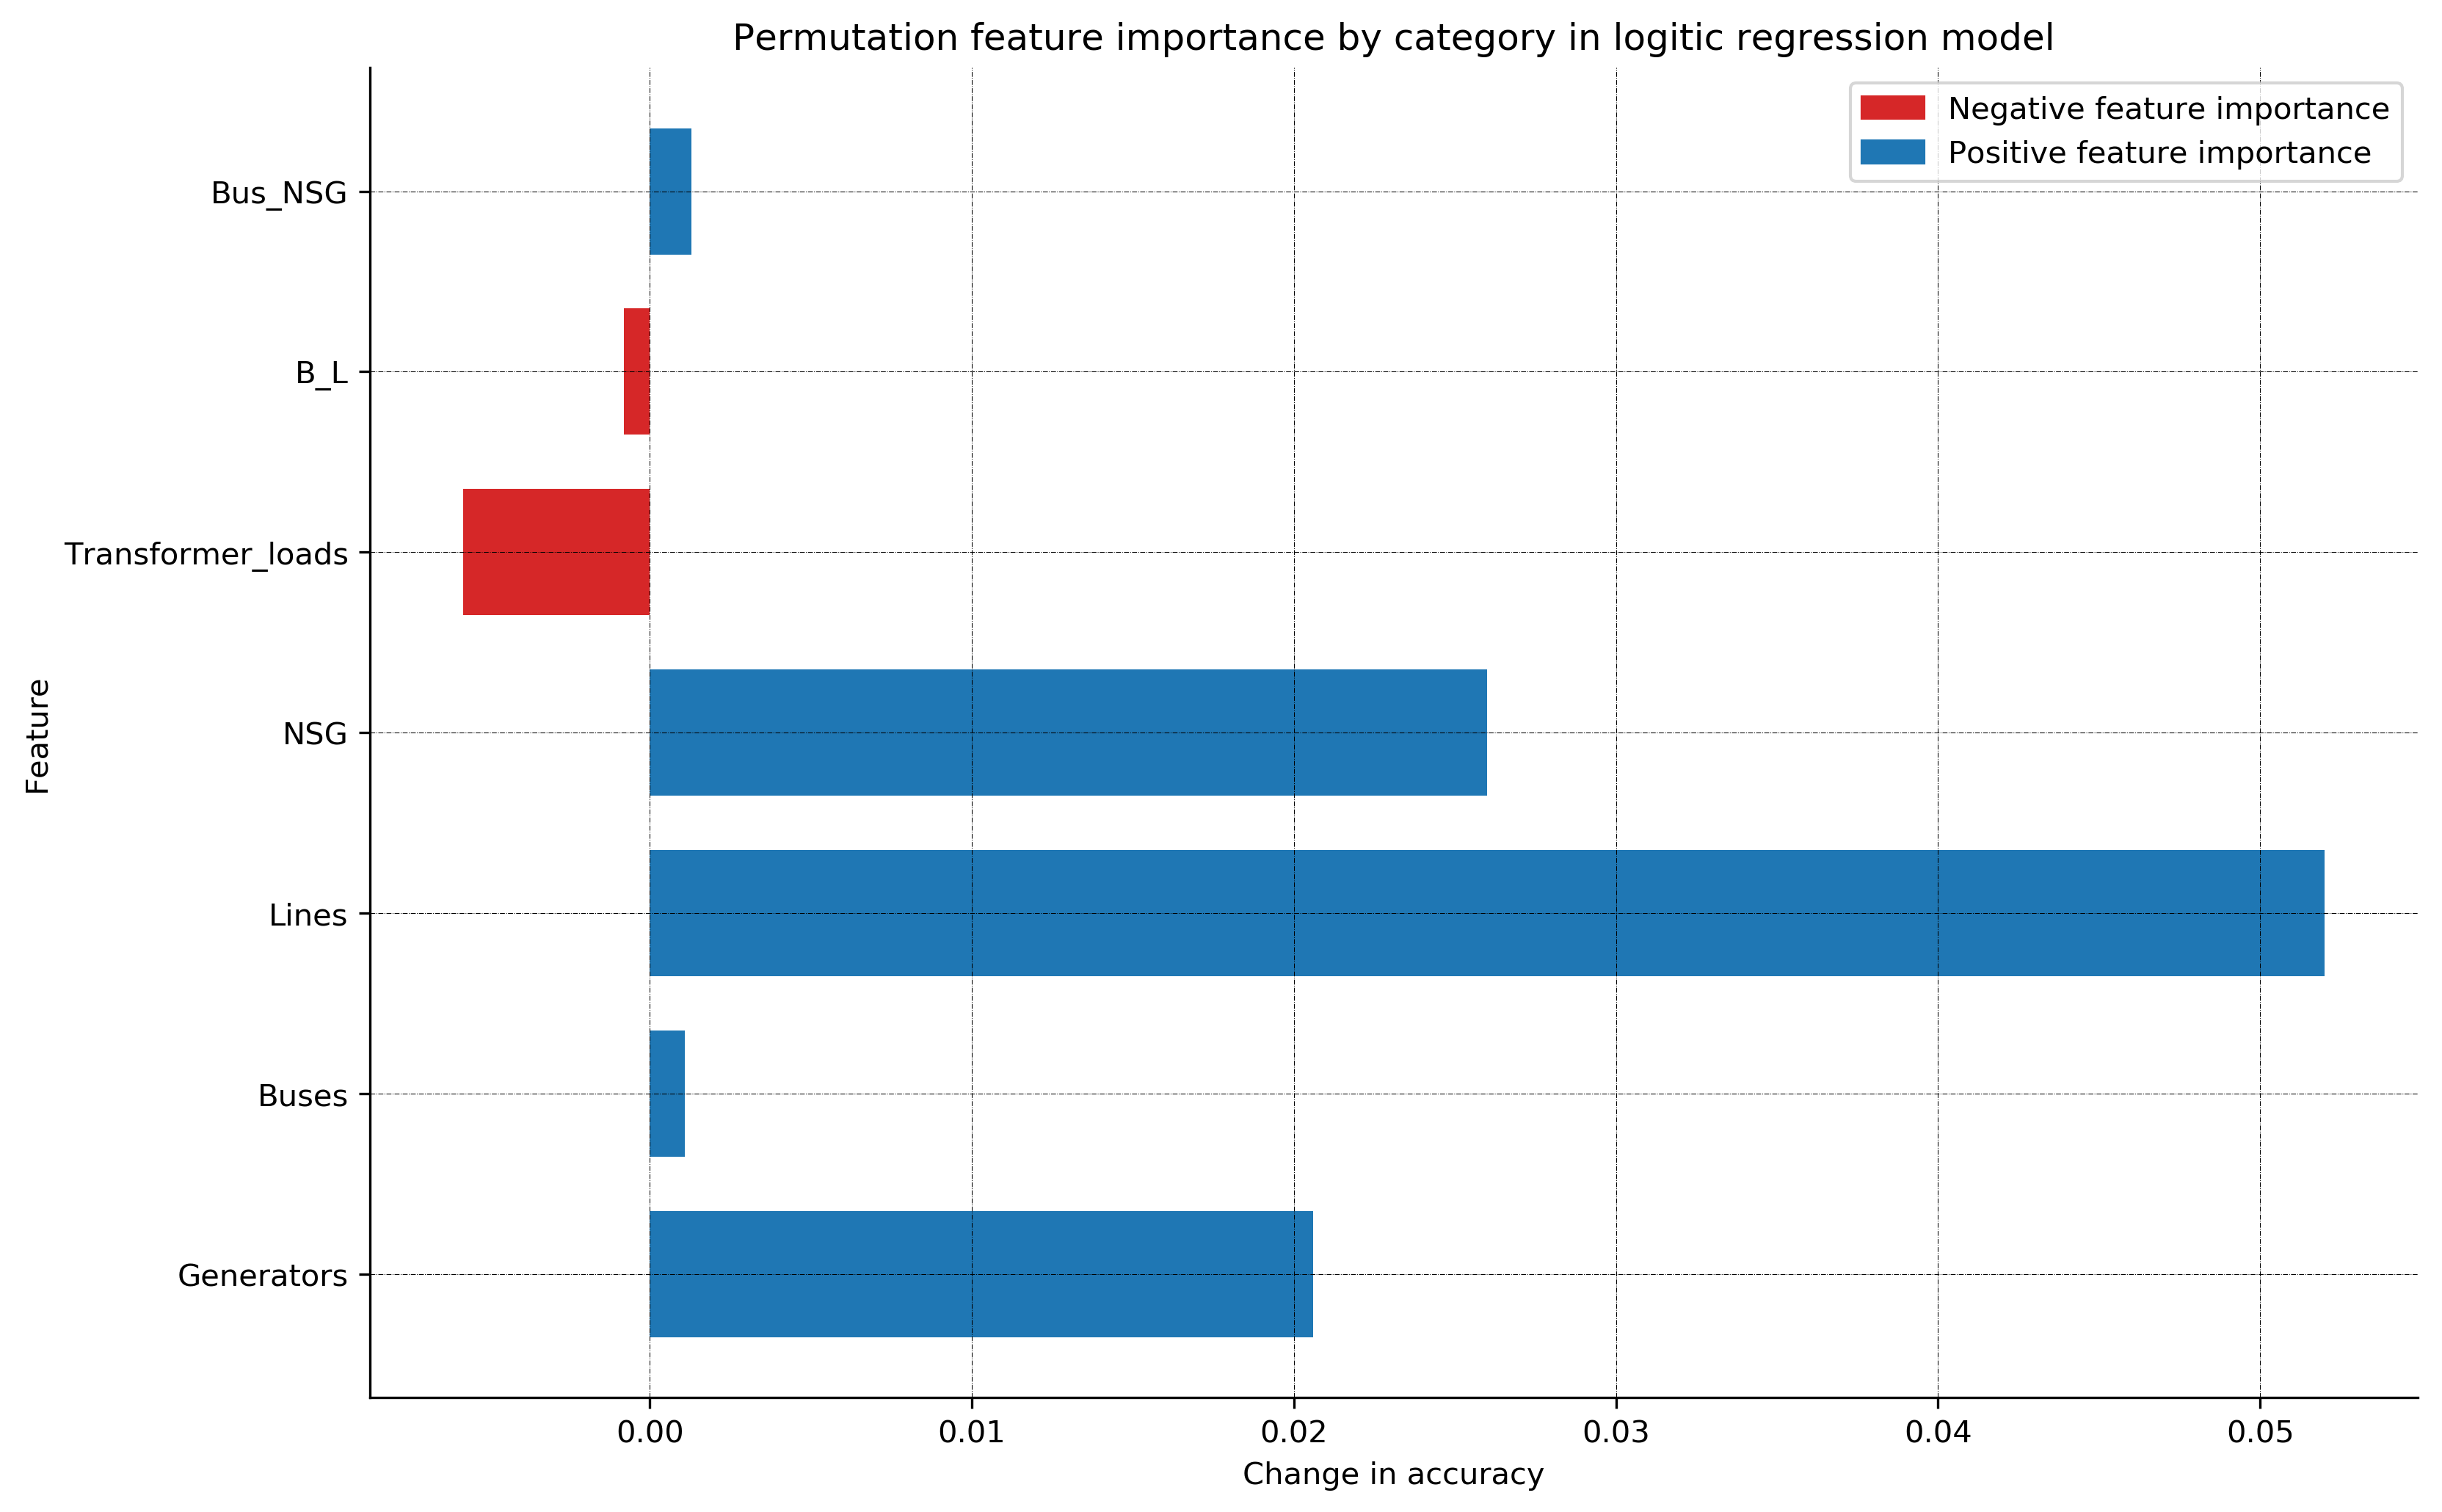

In [6]:
def get_color(value):
    blue, red = sns.color_palette()[0], sns.color_palette()[3]
    if value >= 0: return blue
    return red

patch_1 = mpatches.Patch(color=sns.color_palette()[3], label='Negative feature importance')
patch_2 = mpatches.Patch(color=sns.color_palette()[0], label='Positive feature importance')

fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

x = np.arange(len(imp))
width = 0.7
delta_loss = [v for v in imp.values()]
colors = [get_color(x) for x in delta_loss]
plt.barh(x, delta_loss, width, color=colors)
plt.yticks(x, imp.keys(),
           rotation=0)
plt.grid(color='k', ls = '-.', lw = 0.25)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("Change in accuracy")
plt.ylabel("Feature")
ax.set_title('Permutation feature importance by category in logitic regression model')
_= plt.legend(handles=[patch_1,patch_2])